In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %pip install tensorflow opencv-python matplotlib

In [ ]:
# !pip list

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Remove Dodgy Images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir= '/content/drive/My Drive/Image_Classifier/data'

In [ ]:
image_exts=['jpeg','jpg','png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts :
                print("Image not in extension list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

In [ ]:
img = cv2.imread(os.path.join(data_dir,'Elephants','African_Bush_Elephant.jpg'))
print(img.shape)

(3888, 2592, 3)


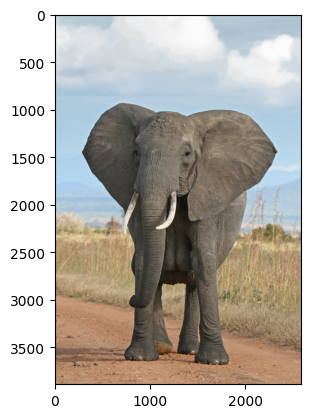

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
# tf.keras.utils.image_dataset_from_directory??

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir,batch_size=32)

Found 545 files belonging to 4 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
# tf.data.Dataset??
# data = data.map??

In [ ]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([1, 2, 3, 3, 2, 3, 0, 3, 2, 2, 2, 3, 0, 3, 0, 0, 2, 0, 0, 3, 1, 3,
       1, 2, 2, 1, 2, 3, 2, 1, 2, 3], dtype=int32)

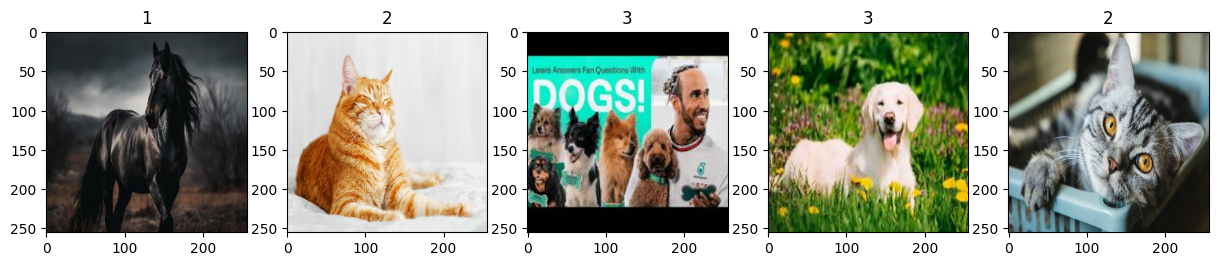

In [ ]:
# 0 for Elephant
# 1 for Horse
# 2 for Cat
# 3 for Dog
fig, ax = plt.subplots(ncols=5 , figsize = (15,15))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y : (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

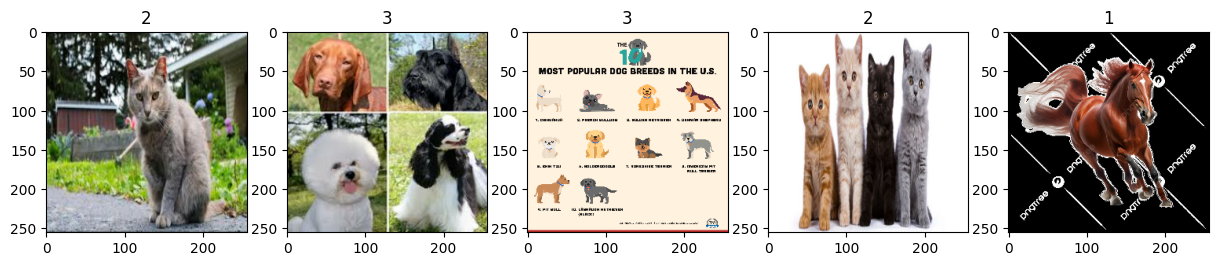

In [ ]:
fig, ax = plt.subplots(ncols=5 , figsize = (15,15))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

18

In [ ]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
train_size + val_size + test_size

18

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import regularizers

In [56]:
model = Sequential()

In [57]:
model.add(Conv2D(8, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [59]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       1,843,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,847,036 (7.05 MB)

 Trainable params: 1,847,036 (7.05 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
logdir = 'logs'

In [61]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [62]:
hist = model.fit(train, epochs = 10, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.2810 - loss: 1.6071 - val_accuracy: 0.3958 - val_loss: 1.3745
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.3359 - loss: 1.3775 - val_accuracy: 0.3333 - val_loss: 1.3643
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.4562 - loss: 1.3422 - val_accuracy: 0.4479 - val_loss: 1.2509
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.5050 - loss: 1.2288 - val_accuracy: 0.6042 - val_loss: 1.0627
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.6025 - loss: 1.0452 - val_accuracy: 0.6042 - val_loss: 0.9410
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6858 - loss: 0.8615 - val_accuracy: 0.7188 - val_loss: 0.7252
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.7537 - loss: 0.6660 - val_accuracy: 0.8021 - val_loss: 0.5648
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.8481 - loss: 0.5098 - val_accuracy: 0.8750 - val_loss:

In [63]:
hist.history

{'accuracy': [0.26682692766189575,
  0.2836538553237915,
  0.48317307233810425,
  0.5240384340286255,
  0.6057692170143127,
  0.6947115659713745,
  0.7692307829856873,
  0.84375,
  0.8942307829856873,
  0.9254807829856873],
 'loss': [1.5170601606369019,
  1.376836895942688,
  1.328294277191162,
  1.1990350484848022,
  1.0183851718902588,
  0.8374046087265015,
  0.64244544506073,
  0.4991152882575989,
  0.3617130517959595,
  0.27032944560050964],
 'val_accuracy': [0.3958333432674408,
  0.3333333432674408,
  0.4479166567325592,
  0.6041666865348816,
  0.6041666865348816,
  0.71875,
  0.8020833134651184,
  0.875,
  0.9479166865348816,
  0.9583333134651184],
 'val_loss': [1.3744951486587524,
  1.364312767982483,
  1.2508912086486816,
  1.0626763105392456,
  0.9409847259521484,
  0.7252492904663086,
  0.5648410320281982,
  0.380832701921463,
  0.2631222903728485,
  0.19517171382904053]}

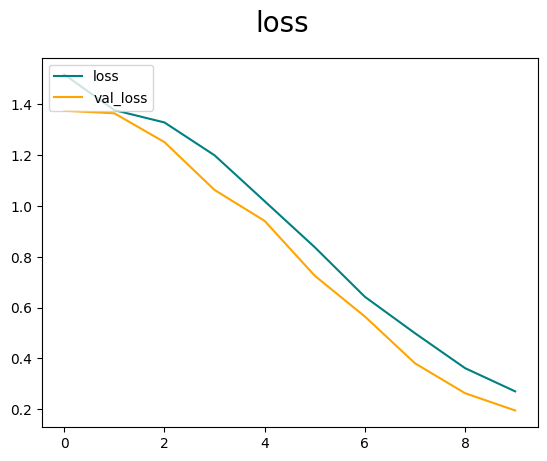

In [64]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

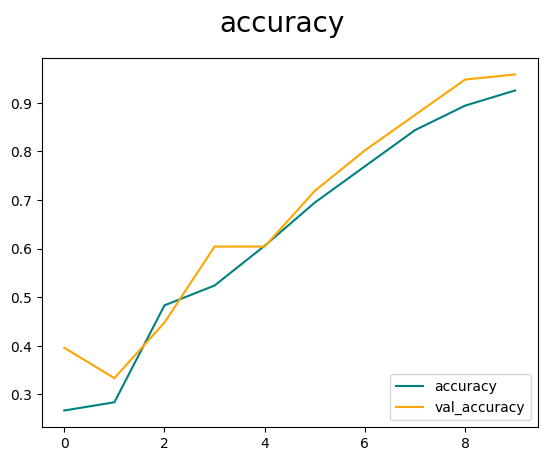

In [65]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('accuracy', fontsize = 20)
plt.legend(loc = 'lower right')
plt.show()

In [66]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy

In [67]:
pre= Precision()
re = Recall()
acc= Accuracy()

In [68]:
for batch in test.as_numpy_iterator():
    x, y =batch
    yhat = model.predict(x)
    yhat_classes = np.argmax(yhat, axis=1)
    pre.update_state(y, yhat_classes)
    re.update_state(y, yhat_classes)
    acc.update_state(y, yhat_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [69]:
print(f'Precision:- {pre.result().numpy()}, Recall:- {re.result().numpy()}, Accuracy:- {acc.result().numpy()}')

Precision:- 1.0, Recall:- 1.0, Accuracy:- 0.9696969985961914


In [70]:
model.save('model.h5')

In [71]:
model1 = models.load_model('model.h5')

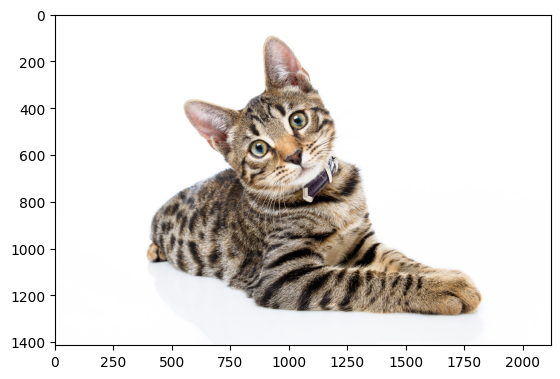

In [97]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

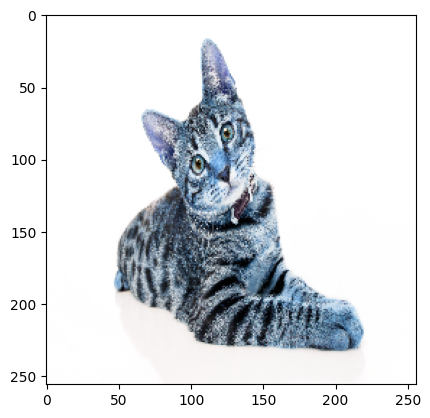

In [98]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [99]:
yhat = model1.predict(np.expand_dims(resize/256 , 0))
yhat_classes = np.argmax(yhat, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [100]:
print(yhat_classes)

[2]


In [101]:
# Define a mapping of class indices to class names
class_names = ['Horse', 'Dog', 'Cat', 'Elephant']

# Map the class indices to class names
class_predictions = [class_names[index] for index in yhat_classes]

# Now, `class_predictions` contains the predicted class names for each test sample
print(class_predictions)

['Cat']
